In [ ]:
!pip install tensorflow==2.9.1
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 92.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [ ]:
print(tf.__version__)

2.9.1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

dataset_url='https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'

od.download(dataset_url) 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kriza21
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:17<00:00, 166MB/s]


In [ ]:
import os 

print('Training Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')

Training Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
There are 0 directories,2008 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy
There are 0 directories,1826 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Cherry_(including_sour)___healthy
There are 0 directories,1851 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight
There are 0 directories,1926 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy
There are 0 directories,2016 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/

In [ ]:
print('Testing Folder')
for dirpath,filename,dirname in os.walk('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'):
  print(f'There are {len(filename)} directories,{len(dirname)} images in {dirpath}')
  

Testing Folder
There are 38 directories,0 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
There are 0 directories,502 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Apple___healthy
There are 0 directories,456 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Cherry_(including_sour)___healthy
There are 0 directories,463 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Late_blight
There are 0 directories,481 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy
There are 0 directories,504 images in /content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Pl

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
test_dir = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

train_data = image_dataset_from_directory(train_dir,
                                             image_size=(224,224),
                                             label_mode='categorical',
                                             batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(224,224),
                                         label_mode='categorical',
                                         batch_size=32)

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [ ]:
train_data,test_data

(<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>)

In [ ]:
class_names = train_data.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os 
def get_random_image(directory,class_names=class_names):
  rn = random.randint(0,len(class_names)-1)
  choice = random.choice(os.listdir(os.path.join(directory,class_names[rn])))
  img_path= os.path.join(directory,class_names[rn],choice)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  fontsize=10
  plt.title(class_names[rn],fontdict={'fontsize': fontsize})
  plt.axis(False)

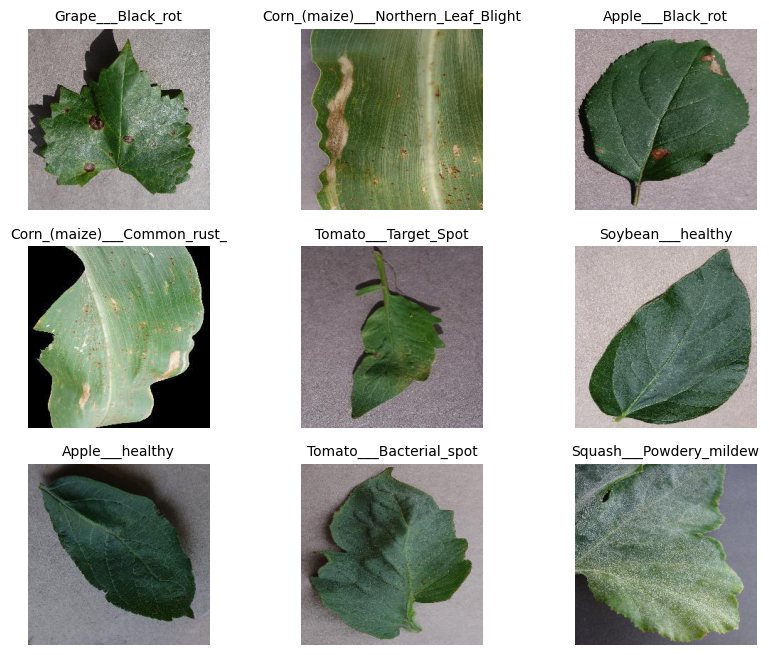

In [ ]:
plt.figure(figsize=(10,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  get_random_image(train_dir)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

image_shape = (224,224,3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False,)
base_model.trainable = False

inputs =  layers.Input(shape = image_shape,name='input_layer')

x = base_model(inputs)

x = layers.GlobalAveragePooling2D(name='GlobalAveragePooling2D_layer')(x)

outputs = layers.Dense(38,activation='softmax',name='output_layer')(x)

feature_model = tf.keras.Model(inputs,outputs,name='plant_disease_model')

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-20]:
  layer.trainable = False

feature_model.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=['accuracy'])

In [ ]:
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", 
                                                  patience=3)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2, 
                                                 patience=2,
                                                 verbose=1, 
                                                 min_lr=1e-7)

checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=True,
                                                      monitor="val_loss")

In [ ]:
initial_epochs = 1

history1 = feature_model.fit(
    train_data,
    epochs=initial_epochs,
    validation_data=test_data,
    callbacks=[
        early_stopping,
        model_checkpoint,
        reduce_lr,
        create_tensorboard_callback('plant_disease_model', 'EfficientNetB010')
    ]
)


Saving TensorBoard log files to: plant_disease_model/EfficientNetB010/20230507-133547
2197/2197 [==============================] - 8450s 4s/step - loss: 0.1366 - accuracy: 0.9589 - val_loss: 0.0339 - val_accuracy: 0.9878 - lr: 0.0010


In [ ]:
checkpoint_path = "fine_tune_checkpoints/"

feature_model.load_weights(checkpoint_path)

In [ ]:
evaluation_results = feature_model.evaluate(test_data)

550/550 [==============================] - 1505s 3s/step - loss: 0.0339 - accuracy: 0.9878


In [ ]:
from tensorflow.keras.models import load_model

feature_model.save('best_plant_model.h5')

In [ ]:
model = load_model('best_plant_model.h5')


In [ ]:
tf.keras.models.save_model(feature_model,'my_model2.hdf5')

In [ ]:
import pickle

In [ ]:
with open('plant.pkl', 'wb') as f:
 pickle.dump(model,f)

In [ ]:
def load_prep(img_path):
  img = tf.io.read_file(img_path)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img,size=(224,224))

  return img

Text(0.5, 0.98, '(224, 224, 3)')

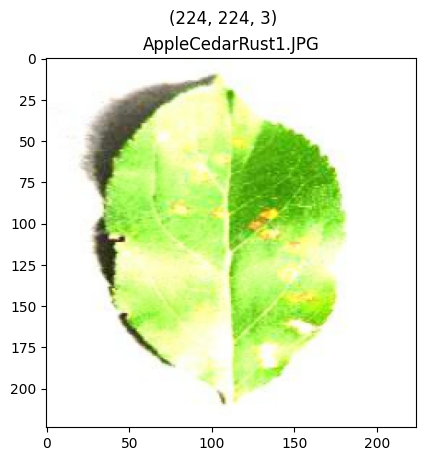

In [ ]:
image = load_prep('/content/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')
plt.imshow(image/255.)
plt.title('AppleCedarRust1.JPG')
plt.suptitle(image.shape)

In [ ]:
pred = feature_model.predict(tf.expand_dims(image,axis=0))
pred

1/1 [==============================] - 2s 2s/step


array([[1.04250712e-10, 5.92972893e-10, 1.00000000e+00, 8.84222606e-15,
        7.19948268e-10, 2.86474471e-14, 4.56384774e-14, 2.21575402e-16,
        1.41007225e-12, 7.16301187e-20, 1.94469897e-16, 1.29626944e-16,
        3.41520052e-13, 1.90447823e-13, 5.61849219e-14, 1.43903303e-12,
        2.82511204e-14, 9.34488760e-14, 2.58440001e-15, 1.01156334e-16,
        7.56148345e-15, 4.80162522e-15, 2.76727676e-16, 6.06070980e-14,
        1.75887219e-18, 2.66178052e-17, 2.21212463e-14, 4.80197060e-16,
        9.59438014e-14, 5.47085928e-16, 1.16276604e-13, 5.07096093e-17,
        2.87808197e-17, 2.37505164e-18, 1.44994531e-13, 2.16025827e-18,
        2.52150083e-15, 8.56158626e-15]], dtype=float32)

In [ ]:
class_names = test_data.class_names

def random_image_predict(model,test_dir=test_dir,class_names=class_names,rand_class=True,cls_name=None):
  if rand_class==True:
    ran_cls = random.randint(0,len(class_names))
    cls = class_names[ran_cls]
    ran_path = test_dir +'/'+ cls+ '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  else:
    cls = class_names[cls_name]
    ran_path = test_dir +'/'+ cls + '/'+ random.choice(os.listdir(test_dir+'/'+cls))
  
  prep_img = load_prep(ran_path)

  pred = model.predict(tf.expand_dims(prep_img,axis=0))
  pred_cls = class_names[pred[0].argmax()]
  pred_percent = pred[0][pred[0].argmax()]*100
  plt.imshow(prep_img/255.)
  if pred_cls == cls:
    c = 'g'
  else:
    c = 'r'
  plt.title(f'actual:{cls},\npred:{pred_cls},\nprob:{pred_percent:.2f}%',color = c ,fontdict={'fontsize':10})
  plt.axis(False)

1/1 [==============================] - 0s 476ms/step


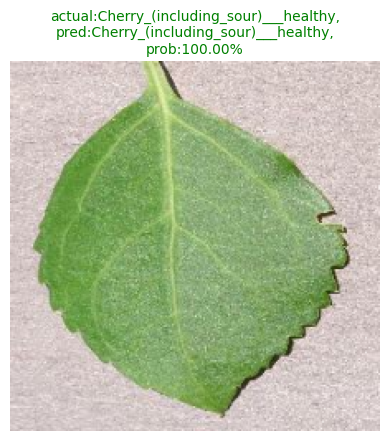

In [ ]:
random_image_predict(feature_model)

1/1 [==============================] - 0s 103ms/step


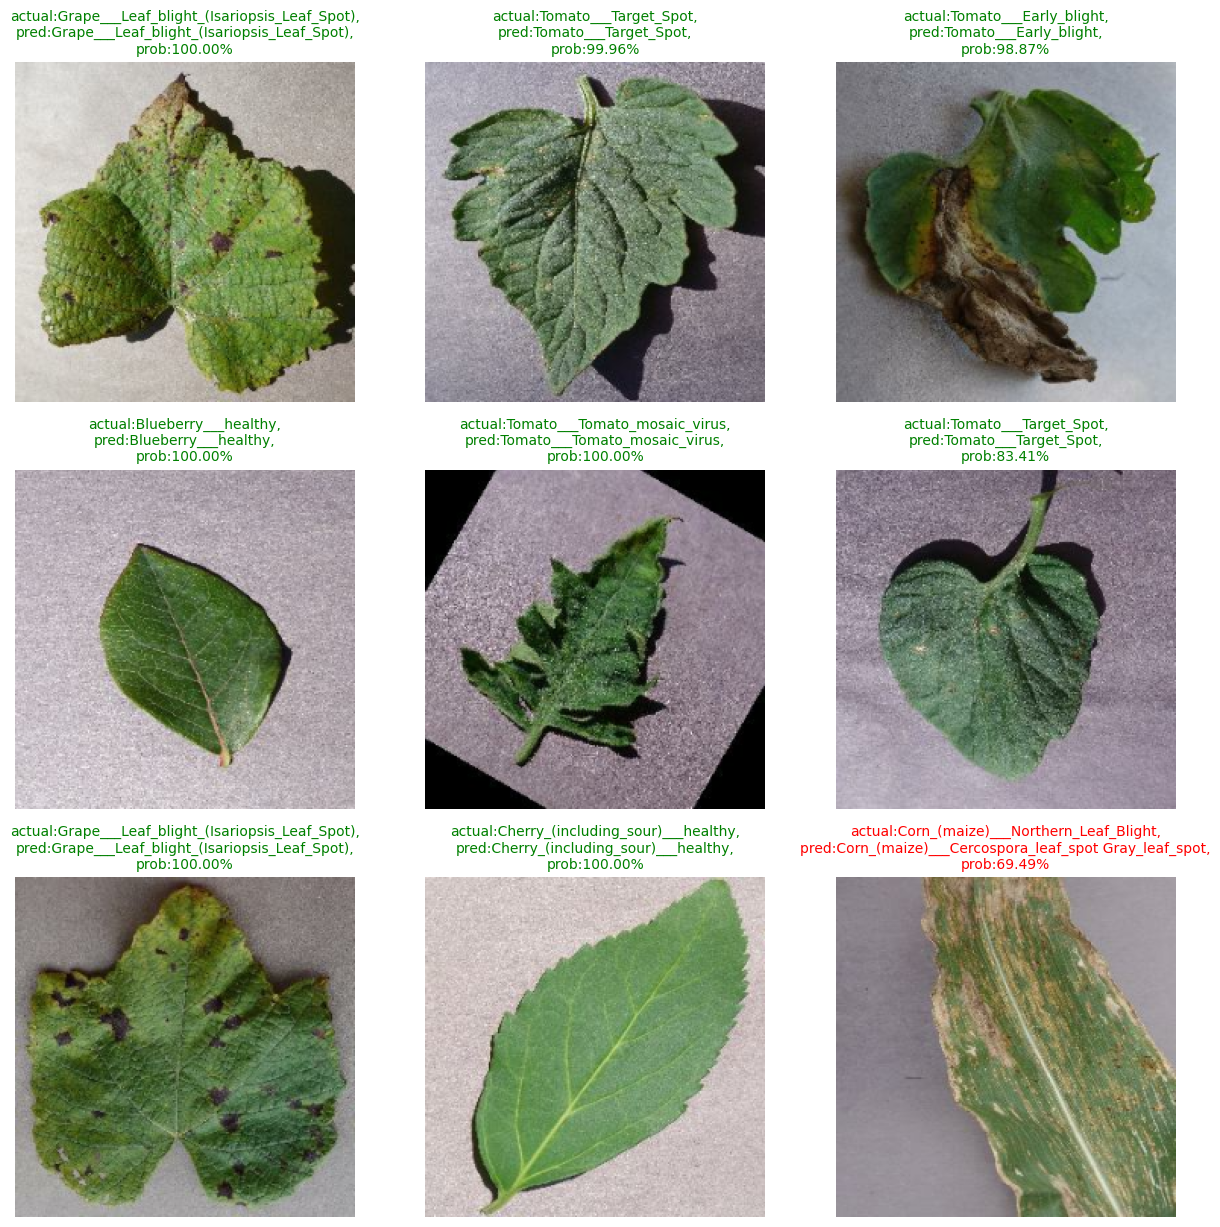

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_image_predict(feature_model,test_dir)

1/1 [==============================] - 0s 95ms/step


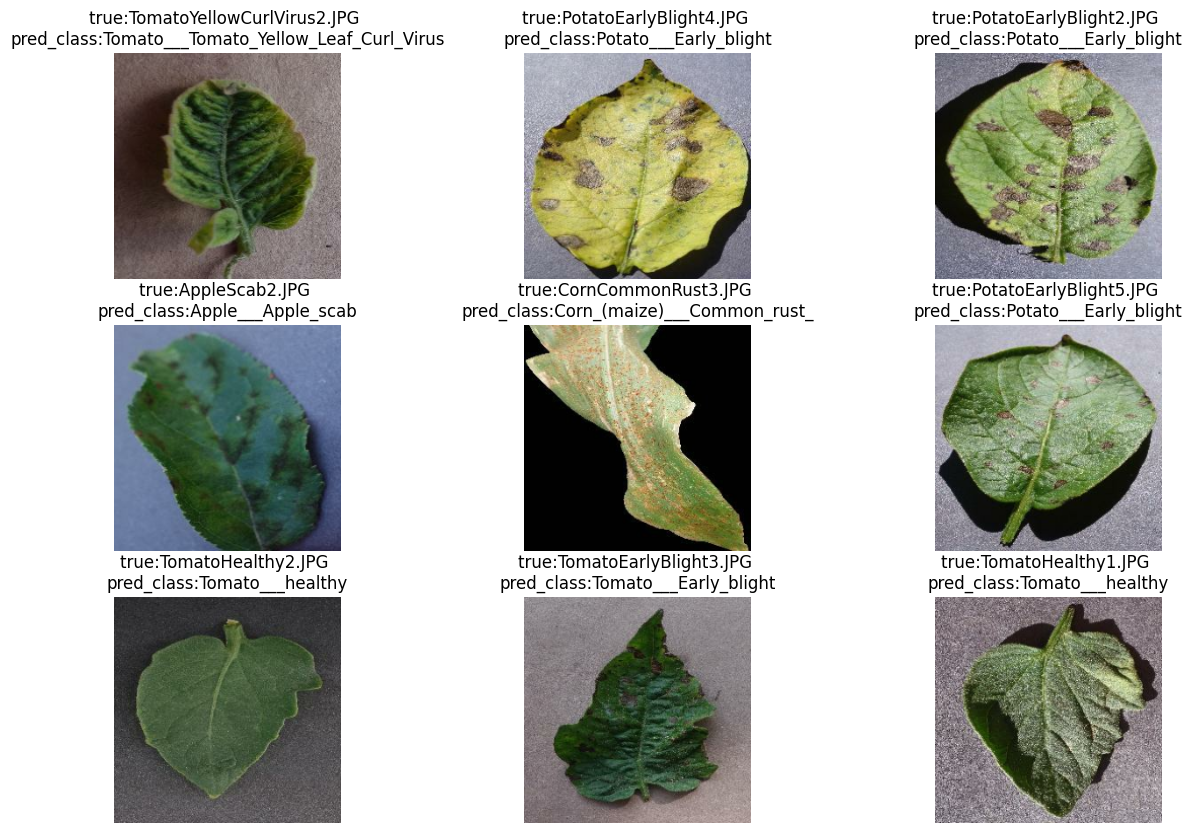

In [ ]:
data_dir='/content/new-plant-diseases-dataset/test/test'
plt.figure(figsize=(15,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  rn = random.choice(os.listdir(data_dir))
  image_path=os.path.join(data_dir,rn)
  img = load_prep(image_path)
  pred = feature_model.predict(tf.expand_dims(img,axis=0))
  pred_name = class_names[pred.argmax()]
  plt.imshow(img/255.)
  plt.title(f'true:{rn} \npred_class:{pred_name}')
  plt.axis(False)

In [ ]:
def predict_img(img_path,model=feature_model,):
  img = load_prep(img_path)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_name = class_names[pred.argmax()]

  plt.imshow(img/255.)
  plt.title(f'predicted_class : {pred_name}')
  plt.axis(False)

In [ ]:
!wget https://www.agric.wa.gov.au/sites/gateway/files/styles/landscape_large/public/Apple%20scab%20-%20mature%20infection%20on%20leaves.jpg?itok=ftqPUwHl

--2023-05-07 16:52:03--  https://www.agric.wa.gov.au/sites/gateway/files/styles/landscape_large/public/Apple%20scab%20-%20mature%20infection%20on%20leaves.jpg?itok=ftqPUwHl
Resolving www.agric.wa.gov.au (www.agric.wa.gov.au)... 159.207.224.203
Connecting to www.agric.wa.gov.au (www.agric.wa.gov.au)|159.207.224.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40480 (40K) [image/jpeg]
Saving to: ‘Apple scab - mature infection on leaves.jpg?itok=ftqPUwHl’

Apple scab - mature 100%[===================>]  39.53K  53.5KB/s    in 0.7s    

2023-05-07 16:52:06 (53.5 KB/s) - ‘Apple scab - mature infection on leaves.jpg?itok=ftqPUwHl’ saved [40480/40480]



1/1 [==============================] - 0s 346ms/step


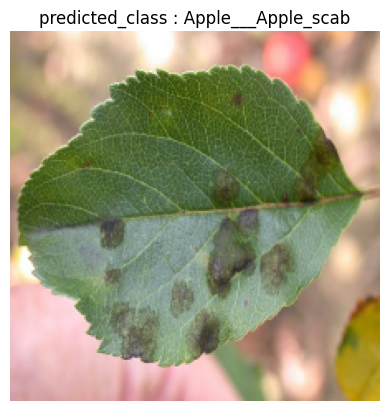

In [ ]:
predict_img('Apple scab - mature infection on leaves.jpg')

*Deploy*

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=7a07e1b467d59cfc29f5b2cab54fd98dd0e075732dc1c21062522900169f0121
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np

class_names = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust",
               "Apple___healthy", "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew","Cherry_(including_sour)___healthy",
               "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot", "Corn_(maize)___Common_rust_",
               "Corn_(maize)___Northern_Leaf_Blight", "Corn_(maize)___healthy", "Grape___Black_rot",
               "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)", "Grape___healthy",
               "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot", "Peach___healthy",
               "Pepper_bell___Bacterial_spot","Pepper_bell___healthy","Potato___Early_blight", "Potato___Late_blight",
               "Potato___healthy", "Raspberry___healthy", "Soybean___healthy", "Squash___Powdery_mildew",
               "Strawberry___Leaf_scorch", "Strawberry___healthy", "Tomato___Bacterial_spot",
               "Tomato___Early_blight","Tomato___Late_blight" "Tomato___Leaf_Mold", "Tomato___Septoria_leaf_spot",
               "Tomato___Spider_mites Two-spotted_spider_mite", "Tomato___Target_Spot",
               "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Tomato___Tomato_mosaic_virus", "Tomato___healthy"]

class SessionState:
    def __init__(self):
        self.cache = {}

# Create a SessionState object
session_state = SessionState()

def load_model():
    model = tf.keras.models.load_model('/content/best_plant_model.h5')
    return model

def get_model():
    if 'model' not in session_state.cache:
        session_state.cache['model'] = load_model()
    return session_state.cache['model']

model = get_model()

st.write("""
         # Leaf disease detection
         """
         )

file = st.file_uploader("Please upload a brain scan file", type=["jpg", "png"])

st.set_option('deprecation.showfileUploaderEncoding', False)

def import_and_predict(image_data, model):
    size = (224, 224)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_reshape = img[np.newaxis, ...]
    pred = model.predict(img_reshape)
    return pred

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(predictions)
    st.write(score)
    predicted_class_index = np.argmax(score)
    predicted_class_name = class_names[predicted_class_index]
    st.write("Predicted Class:", predicted_class_name)


Overwriting app.py


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=7a6c004eb9bcb0852ddc6480c2cad66e19dbac48b4e0cf516410f14ada99ec91
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-05-07 16:55:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  43.7MB/s    in 0.3s    

2023-05-07 16:55:59 (43.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!ngrok config add-authtoken 2PManWbX9xCVK0axH4R5uKDohgl_5mecrjc6G1R3y6vFcjzqC

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://b6ee-34-86-103-246.ngrok-free.app


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.103.246:8501

2023-05-07 17:30:51.071182: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-05-07 17:30:51.071230: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
1/1 [==============================] - 3s 3s/step
  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/click/core.py", line 1055, in main
    rv = se